# 手寫阿拉伯數字辨識 完整版

## 步驟1：載入 MNIST 手寫阿拉伯數字資料

In [106]:
import tensorflow as tf

# 載入 MNIST 手寫阿拉伯數字資料
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()
#(x_train, y_train),(x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()


# 訓練/測試資料的 X/y 維度
print(x_train.shape, y_train.shape,x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [107]:
# 訓練資料前10筆圖片的數字
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [108]:
# 顯示第1張圖片內含值
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [109]:
# 將非0的數字轉為1，顯示第1張圖片
data = x_train[0].copy()
data[data>0]=1

# 將轉換後二維內容顯示出來，隱約可以看出數字為 5
text_image=[]
for i in range(data.shape[0]):
    text_image.append(''.join(data[i].astype(str)))
text_image

['0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000001111111111110000',
 '0000000011111111111111110000',
 '0000000111111111111111100000',
 '0000000111111111110000000000',
 '0000000011111110110000000000',
 '0000000001111100000000000000',
 '0000000000011110000000000000',
 '0000000000011110000000000000',
 '0000000000001111110000000000',
 '0000000000000111111000000000',
 '0000000000000011111100000000',
 '0000000000000001111100000000',
 '0000000000000000011110000000',
 '0000000000000011111110000000',
 '0000000000001111111100000000',
 '0000000000111111111000000000',
 '0000000011111111110000000000',
 '0000001111111111000000000000',
 '0000111111111100000000000000',
 '0000111111110000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000']

In [110]:
# 將非0的數字轉為1，顯示第2張圖片
data = x_train[1].copy()
data[data>0]=1

# 將轉換後二維內容顯示出來，隱約可以看出數字為 0
text_image=[]
for i in range(data.shape[0]):
    text_image.append(''.join(data[i].astype(str)))
text_image

['0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000001111100000000',
 '0000000000000011111100000000',
 '0000000000000111111111000000',
 '0000000000011111111111000000',
 '0000000000011111111111000000',
 '0000000000111111111111000000',
 '0000000001111111110011100000',
 '0000000011111100000011100000',
 '0000000111111100000011100000',
 '0000000111100000000011100000',
 '0000000111000000000011100000',
 '0000001111000000000011100000',
 '0000001111000000001111100000',
 '0000001110000000011111000000',
 '0000001110000000111100000000',
 '0000001110000001111000000000',
 '0000001111111111111000000000',
 '0000001111111111100000000000',
 '0000001111111110000000000000',
 '0000000111111100000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000']

In [111]:
# 將非0的數字轉為1，顯示第2張圖片
data = x_train[2].copy()
data[data>0]=1

# 將轉換後二維內容顯示出來，隱約可以看出數字為 0
text_image=[]
for i in range(data.shape[0]):
    text_image.append(''.join(data[i].astype(str)))
text_image

['0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000011100000',
 '0000110000000000000011100000',
 '0000110000000000000111100000',
 '0000110000000000000111000000',
 '0000110000000000000111000000',
 '0001110000000000000111000000',
 '0001110000000000001111000000',
 '0001110000000000001111000000',
 '0001110000000001111110000000',
 '0001110001111111111110000000',
 '0001111111111111111100000000',
 '0000111111110000011100000000',
 '0000000000000000011100000000',
 '0000000000000000011100000000',
 '0000000000000000011100000000',
 '0000000000000000011100000000',
 '0000000000000000011100000000',
 '0000000000000000011100000000',
 '0000000000000000011100000000',
 '0000000000000000011100000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000']

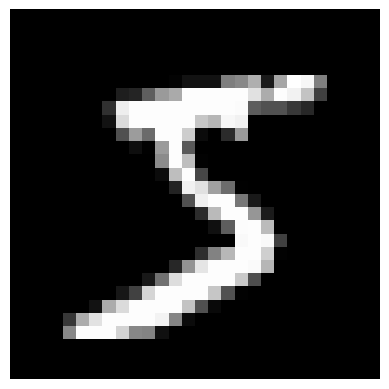

In [112]:
# 顯示第1張圖片圖像
import matplotlib.pyplot as plt

# 第一筆資料
X2 = x_train[0,:,:]

# 繪製點陣圖，cmap='gray':灰階
plt.imshow(X2.reshape(28,28), cmap='gray')

# 隱藏刻度
plt.axis('off') 

# 顯示圖形
plt.show() 

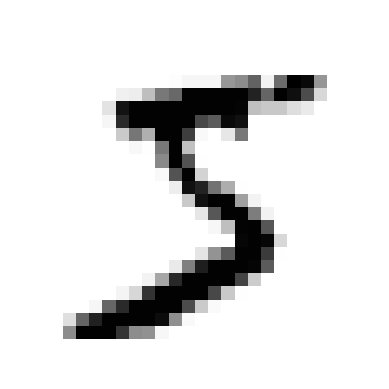

In [113]:
# 顯示第1張圖片圖像
import matplotlib.pyplot as plt

# 第一筆資料
X2 = x_train[0,:,:]

# 繪製點陣圖，cmap='gray':灰階
plt.imshow(X2.reshape(28,28), cmap='Greys')

# 隱藏刻度
plt.axis('off') 

# 顯示圖形
plt.show() 

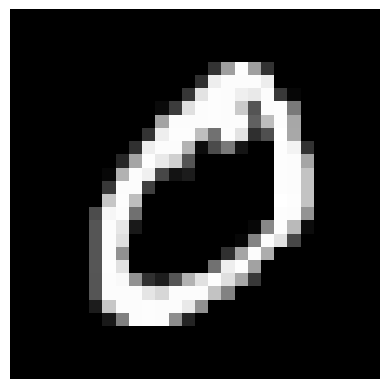

In [114]:
# 顯示第2張圖片圖像
import matplotlib.pyplot as plt

# 第一筆資料
X2 = x_train[1,:,:]

# 繪製點陣圖，cmap='gray':灰階
plt.imshow(X2.reshape(28,28), cmap='gray')

# 隱藏刻度
plt.axis('off') 

# 顯示圖形
plt.show() 

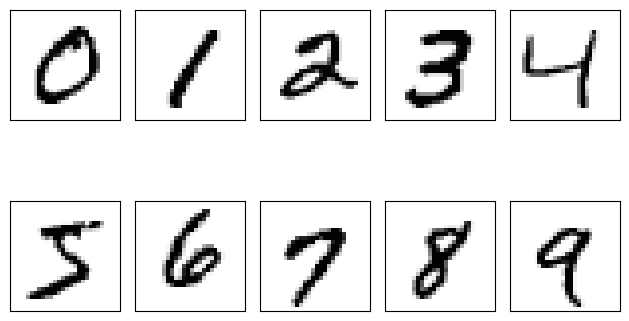

In [115]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(10):
    img = x_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('images/12_5.png', dpi=300)
plt.show()

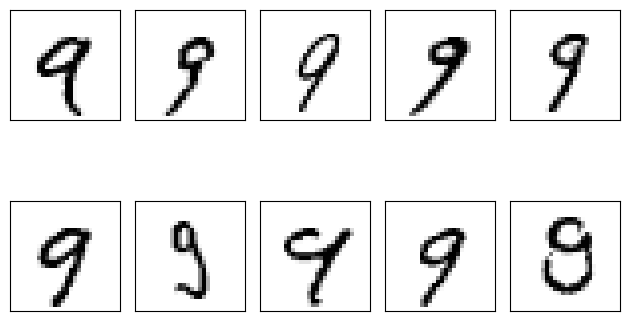

In [116]:
no=9
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(10):
    img = x_train[y_train == no][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('images/12_5.png', dpi=300)
plt.show()

## 步驟2：資料清理，此步驟無需進行

## 步驟3：進行特徵工程，將特徵縮放成(0, 1)之間

In [117]:
# 特徵縮放，使用常態化(Normalization)，公式 = (x - min) / (max - min)
# 顏色範圍：0~255，所以，公式簡化為 x / 255
# 注意，顏色0為白色，與RGB顏色不同，(0,0,0) 為黑色。
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
x_train_norm[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## 步驟4：資料分割，此步驟無需進行，載入MNIST資料時，已經切割好了

## 步驟5：建立模型結構

In [138]:
# 建立模型
model = tf.keras.models.Sequential([
  tf.keras.layers.Input((28, 28)),
  tf.keras.layers.Flatten(),
#   tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [139]:
# 設定優化器(optimizer)、損失函數(loss)、效能衡量指標(metrics)的類別
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']) #, tf.keras.metrics.CategoricalAccuracy()])

## 步驟6：結合訓練資料及模型，進行模型訓練

In [140]:
# 模型訓練
# callback: https://ithelp.ithome.com.tw/articles/10234641
# 自訂 callback: https://ithelp.ithome.com.tw/articles/10235293
history = model.fit(x_train_norm, y_train, epochs=5, validation_split=0.2) #, batch_size=1000)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8435 - loss: 0.5284 - val_accuracy: 0.9563 - val_loss: 0.1542
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9519 - loss: 0.1705 - val_accuracy: 0.9653 - val_loss: 0.1158
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9638 - loss: 0.1236 - val_accuracy: 0.9678 - val_loss: 0.1050
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9725 - loss: 0.0919 - val_accuracy: 0.9722 - val_loss: 0.0918
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9754 - loss: 0.0816 - val_accuracy: 0.9750 - val_loss: 0.0830


In [121]:
60000*0.8/1500

32.0

In [122]:
# 檢查 history 所有鍵值
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

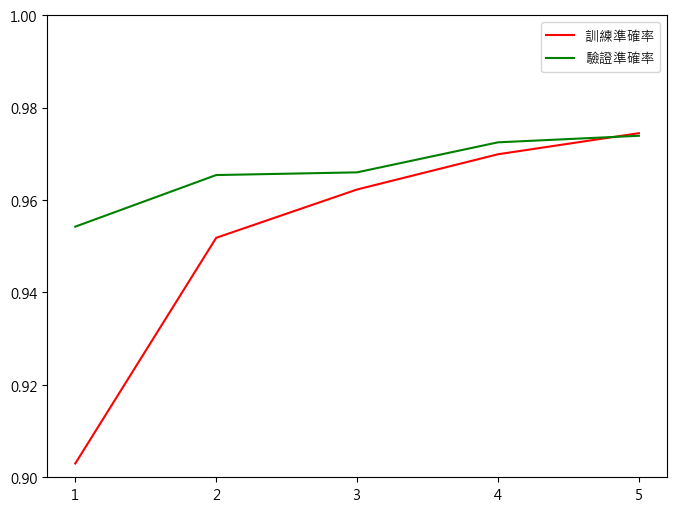

In [123]:
# 對訓練過程的準確率繪圖
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(8, 6))
plt.plot(range(1,6), history.history['accuracy'], 'r', label='訓練準確率')
plt.plot(range(1,6), history.history['val_accuracy'], 'g', label='驗證準確率')
plt.legend()
plt.ylim(0.9, 1)
plt.xticks(range(1,6));

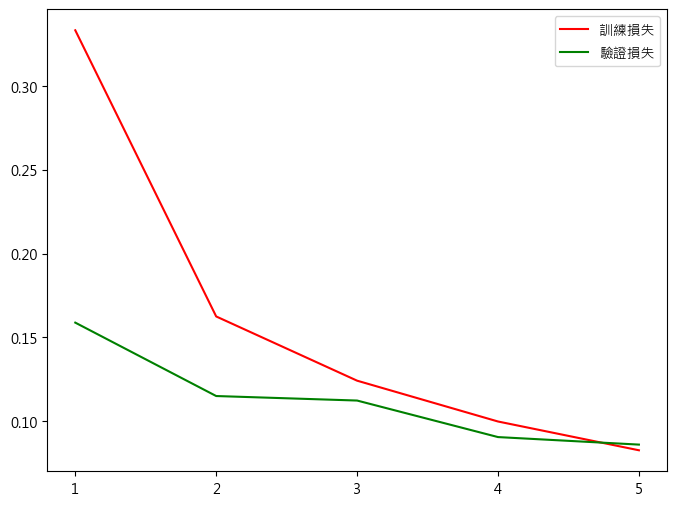

In [124]:
# 對訓練過程的損失繪圖
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(range(1,6), history.history['loss'], 'r', label='訓練損失')
plt.plot(range(1,6), history.history['val_loss'], 'g', label='驗證損失')
plt.legend()
plt.xticks(range(1,6));

## 步驟7：評分(Score Model)

In [141]:
# 評分(Score Model)
score=model.evaluate(x_test_norm, y_test, verbose=0)

for i, x in enumerate(score):
    print(f'{model.metrics_names[i]}: {score[i]:.4f}')

loss: 0.0747
compile_metrics: 0.9769


In [142]:
# 預測 1 筆資料
model.predict(x_test_norm[0:1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


array([[3.1986613e-07, 2.0395021e-09, 1.2902314e-06, 1.2088602e-04,
        3.6205084e-11, 1.7976400e-07, 1.5237568e-13, 9.9987304e-01,
        4.0397973e-07, 3.8392336e-06]], dtype=float32)

In [143]:
# 預測 1 筆資料
import numpy as np
np.around(model.predict(x_test_norm[0:1], verbose=False), 2)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [144]:
y_test[0]

7

In [145]:
model.predict(x_test_norm).shape

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step


(10000, 10)

In [146]:
import numpy as np

np.argmax(model.predict(x_test_norm, verbose=False), axis=-1)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [147]:
# 實際預測 20 筆資料
# predictions = model.predict_classes(x_test_norm)
import numpy as np
predictions = np.argmax(model.predict(x_test_norm), axis=-1)

# 比對
print('actual    :', y_test[0:20])
print('prediction:', predictions[0:20])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step
actual    : [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
prediction: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [148]:
# 顯示第 9 筆的機率
import numpy as np

predictions = model.predict(x_test_norm[8:9])
print(f'0~9預測機率: {np.around(predictions, 2)}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
0~9預測機率: [[0.   0.   0.   0.   0.   0.65 0.34 0.   0.01 0.  ]]


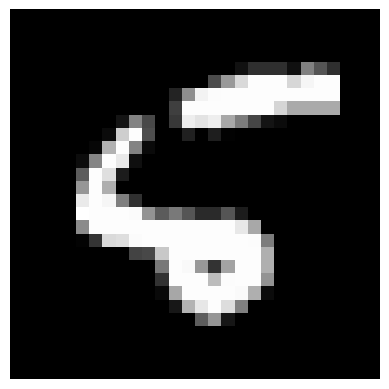

In [149]:
# 顯示第 9 筆圖像
X2 = x_test[8,:,:]
plt.imshow(X2.reshape(28,28), cmap='gray')
plt.axis('off')
plt.show() 

## 步驟8：評估，暫不進行

## 步驟9：模型佈署

In [150]:
# 模型存檔
model.save('model.keras')

# 模型載入
model = tf.keras.models.load_model('model.keras')

## 步驟10：新資料預測

In [100]:
# 使用小畫家，繪製 0~9，實際測試看看
from skimage import io
from skimage.transform import resize
import numpy as np

# 讀取影像並轉為單色
uploaded_file = './myDigits/9.png'
image1 = io.imread(uploaded_file, as_gray=True)
print(image1.shape)

# 縮為 (28, 28) 大小的影像
image_resized = resize(image1, (28, 28), anti_aliasing=True)    
X1 = image_resized.reshape(1, 28, 28) #/ 255

# 反轉顏色，顏色0為白色，與 RGB 色碼不同，它的 0 為黑色
X1 = np.abs(1-X1)

# 預測
#predictions = model.predict_classes(X1)
predictions = np.argmax(model.predict(X1, verbose=0), axis=-1)
print(predictions)

(280, 280)
[0]


In [101]:
model.predict(X1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


array([[0.42538917, 0.00880083, 0.06058691, 0.03320214, 0.01401944,
        0.04900593, 0.24182291, 0.01118457, 0.14592892, 0.01005913]],
      dtype=float32)

In [102]:
np.sum(model.predict(X1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


0.9999999

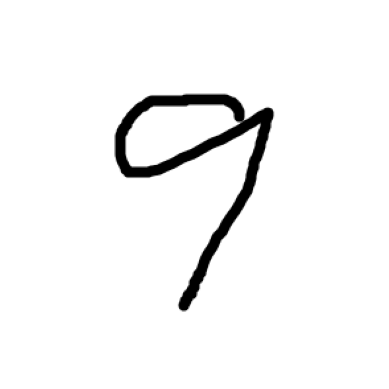

In [103]:
# 繪製點陣圖，cmap='gray':灰階
plt.imshow(image1, cmap='gray')

# 隱藏刻度
plt.axis('off') 

# 顯示圖形
plt.show() 

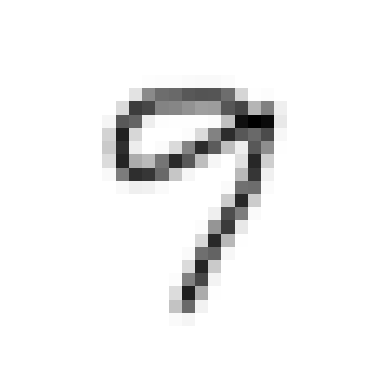

In [104]:
# 繪製點陣圖，cmap='gray':灰階
plt.imshow(image_resized, cmap='gray')

# 隱藏刻度
plt.axis('off') 

# 顯示圖形
plt.show() 

In [105]:
# 讀取影像並轉為單色
for i in range(10):
    uploaded_file = f'./myDigits/{i}.png'
    image1 = io.imread(uploaded_file, as_gray=True)

    # 縮為 (28, 28) 大小的影像
    image_resized = resize(image1, (28, 28), anti_aliasing=True)    
    X1 = image_resized.reshape(1,28, 28) #/ 255

    # 反轉顏色，顏色0為白色，與 RGB 色碼不同，它的 0 為黑色
    X1 = np.abs(1-X1)

    # 預測
    #predictions = model.predict_classes(X1)
    predictions = np.argmax(model.predict(X1, verbose=0), axis=-1)
    print(predictions)

[4]
[5]
[3]
[5]
[5]
[3]
[4]
[0]
[0]
[0]


In [55]:
# 讀取影像並轉為單色
for i in range(10):
    uploaded_file = f'./1/{i}.png'
    image1 = io.imread(uploaded_file, as_gray=True)

    # 縮為 (28, 28) 大小的影像
    image_resized = resize(image1, (28, 28), anti_aliasing=True)    
    X1 = image_resized.reshape(1,28, 28) #/ 255

    # 反轉顏色，顏色0為白色，與 RGB 色碼不同，它的 0 為黑色
    X1 = np.abs(1-X1)

    # 預測
    #predictions = model.predict_classes(X1)
    predictions = np.argmax(model.predict(X1, verbose=0), axis=-1)
    print(predictions)

[0]
[1]
[2]
[3]
[4]
[9]
[6]
[7]
[3]
[3]


## 其他：顯示模型彙總資訊(summary)、繪製圖形顯示模型結構

In [56]:
# 顯示模型的彙總資訊
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305,312 (1.16 MB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 203,542 (795.09 KB)

In [37]:
(784+1) * 128

100480

## 繪製模型
#### 需安裝 graphviz (https://www.graphviz.org/download/)
#### 將安裝路徑 C:\Program Files\GraphvizX.XX\bin 新增至環境變數 path 中
#### pip install graphviz pydotplus

In [38]:
!pip install graphviz pydotplus

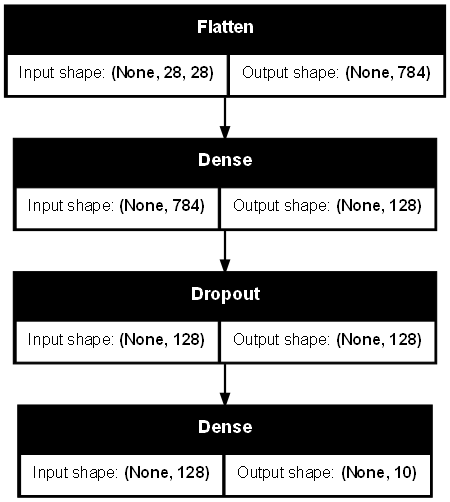

In [57]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, dpi=80)

In [58]:
import pandas as pd 
predictions = np.argmax(model.predict(x_test_norm, verbose=False), axis=-1)
pd.crosstab(y_test, predictions, rownames=['實際值'], colnames=['預測值'])

預測值,0,1,2,3,4,5,6,7,8,9
實際值,,,,,,,,,,
0,970,0,1,1,1,1,3,1,1,1
1,0,1125,4,0,0,1,2,0,3,0
2,3,0,1012,3,2,0,2,4,6,0
3,0,0,1,995,0,3,0,5,3,3
4,1,0,5,1,962,0,2,2,1,8
5,3,1,0,8,1,865,5,3,4,2
6,4,3,0,1,5,3,939,0,3,0
7,0,6,8,4,0,0,0,1005,0,5
8,5,0,2,7,3,4,2,6,942,3


In [61]:
import sklearn.metrics
sklearn.metrics.confusion_matrix(y_true=y_test, 
             y_pred=np.argmax(model.predict(x_test_norm, verbose=False), axis=-1))

array([[ 970,    0,    1,    1,    1,    1,    3,    1,    1,    1],
       [   0, 1125,    4,    0,    0,    1,    2,    0,    3,    0],
       [   3,    0, 1012,    3,    2,    0,    2,    4,    6,    0],
       [   0,    0,    1,  995,    0,    3,    0,    5,    3,    3],
       [   1,    0,    5,    1,  962,    0,    2,    2,    1,    8],
       [   3,    1,    0,    8,    1,  865,    5,    3,    4,    2],
       [   4,    3,    0,    1,    5,    3,  939,    0,    3,    0],
       [   0,    6,    8,    4,    0,    0,    0, 1005,    0,    5],
       [   5,    0,    2,    7,    3,    4,    2,    6,  942,    3],
       [   3,    5,    0,    8,    7,    2,    0,    5,    4,  975]],
      dtype=int64)

In [62]:
model.get_config()

{'name': 'sequential',
 'trainable': True,
 'dtype': {'module': 'keras',
  'class_name': 'DTypePolicy',
  'config': {'name': 'float32'},
  'registered_name': None},
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_shape': (None, 28, 28),
    'dtype': 'float32',
    'sparse': False,
    'name': 'input_layer'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Flatten',
   'config': {'name': 'flatten',
    'trainable': True,
    'dtype': {'module': 'keras',
     'class_name': 'DTypePolicy',
     'config': {'name': 'float32'},
     'registered_name': None},
    'data_format': 'channels_last'},
   'registered_name': None,
   'build_config': {'input_shape': [None, 28, 28]}},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': {'module': 'keras',
     'class_name': 'DTypePolicy',
     'config': {'name': 'float32'},
     'registered_name': None},
    'units

In [63]:
model.get_weights()

[array([[ 0.0809044 ,  0.07917286, -0.06482339, ...,  0.07013039,
          0.07504755,  0.05207706],
        [-0.02497333, -0.01236992,  0.04302789, ...,  0.06798889,
         -0.0354105 , -0.07564886],
        [-0.04448088,  0.06873738, -0.03784256, ..., -0.03598291,
         -0.02969491,  0.06803013],
        ...,
        [-0.00812048,  0.01794385,  0.02310198, ...,  0.05303165,
         -0.03336789,  0.01068083],
        [-0.08101738,  0.01517917, -0.05900958, ...,  0.06586627,
          0.01326834,  0.04574084],
        [-0.02458358, -0.02906403, -0.04696409, ..., -0.01126924,
         -0.05178727,  0.00765872]], dtype=float32),
 array([ 0.03450999, -0.03285579, -0.04283617,  0.01510574,  0.20485777,
        -0.02395947, -0.0715977 ,  0.0469233 ,  0.04092778, -0.03336924,
         0.19323704, -0.06912407, -0.06015337,  0.02791323,  0.17171393,
         0.02111019, -0.14235565, -0.13359559,  0.01628925, -0.1193563 ,
         0.05084974, -0.02780106,  0.08472443,  0.00209647,  0.142

In [64]:
model.get_layer(index=1).name

'dense'

In [65]:
model.get_layer(index=3).get_weights()

[array([[-0.10045324, -0.13584644,  0.355925  , ...,  0.3890693 ,
         -0.22023064, -0.56162435],
        [-0.07362331,  0.02931302,  0.13582888, ...,  0.08148017,
         -0.13066813,  0.13558416],
        [-0.28219143, -0.12000809, -0.16176343, ..., -0.09858816,
          0.19647501,  0.1164397 ],
        ...,
        [-0.36762476, -0.34299445,  0.1915482 , ...,  0.24184486,
         -0.4626299 ,  0.2492086 ],
        [-0.546875  ,  0.08443683,  0.01577949, ..., -0.29313305,
          0.13715446,  0.14991131],
        [ 0.24913605, -0.20019548,  0.20253275, ..., -0.2809191 ,
         -0.40704733, -0.25615185]], dtype=float32),
 array([-0.08032835,  0.02342803,  0.0100064 , -0.15212724,  0.02964998,
         0.03271121, -0.04188653, -0.06735897,  0.17282487,  0.01234803],
       dtype=float32)]

In [70]:
model.get_layer(name='dense').get_weights()

[array([[ 0.0809044 ,  0.07917286, -0.06482339, ...,  0.07013039,
          0.07504755,  0.05207706],
        [-0.02497333, -0.01236992,  0.04302789, ...,  0.06798889,
         -0.0354105 , -0.07564886],
        [-0.04448088,  0.06873738, -0.03784256, ..., -0.03598291,
         -0.02969491,  0.06803013],
        ...,
        [-0.00812048,  0.01794385,  0.02310198, ...,  0.05303165,
         -0.03336789,  0.01068083],
        [-0.08101738,  0.01517917, -0.05900958, ...,  0.06586627,
          0.01326834,  0.04574084],
        [-0.02458358, -0.02906403, -0.04696409, ..., -0.01126924,
         -0.05178727,  0.00765872]], dtype=float32),
 array([ 0.03450999, -0.03285579, -0.04283617,  0.01510574,  0.20485777,
        -0.02395947, -0.0715977 ,  0.0469233 ,  0.04092778, -0.03336924,
         0.19323704, -0.06912407, -0.06015337,  0.02791323,  0.17171393,
         0.02111019, -0.14235565, -0.13359559,  0.01628925, -0.1193563 ,
         0.05084974, -0.02780106,  0.08472443,  0.00209647,  0.142

In [66]:
model.count_params()

101770